In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = np.loadtxt("data_trend.dat")

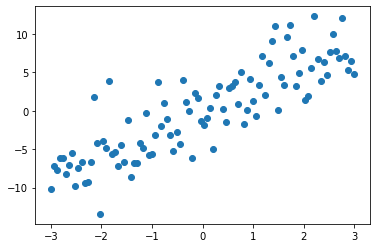

In [13]:
#Quito la media a los datos
data[:,0] = (data[:,0]-np.mean(data[:,0]))
data[:,1] = (data[:,1]-np.mean(data[:,1]))
plt.scatter(data[:,0], data[:,1])

In [15]:
#Calculo la matriz de covarianza
cov_matrix = np.cov(data.T)
print( cov_matrix)

[[ 3.09152137  8.82101855]
 [ 8.82101855 34.56025706]]


In [17]:
#Calculo e imprimo los autovalores
values, vectors = np.linalg.eig(cov_matrix)
print( "values", values)
print( "vectors\n", vectors)

#queremos que el primer autovector corresponda al autovalor mas grande, 
#asi que reorganizamos
tmp = vectors[:,0].copy()
vectors[:,0] = vectors[:,1]
vectors[:,1] = tmp[:]

tmp = values[0]
values[0] =values[1]
values[1] = tmp

print( "arraged values", values)
print( "arranged vectors\n", vectors)

values [ 0.78757722 36.86420121]
vectors
 [[-0.96754198 -0.25271035]
 [ 0.25271035 -0.96754198]]
arraged values [36.86420121  0.78757722]
arranged vectors
 [[-0.25271035 -0.96754198]
 [-0.96754198  0.25271035]]


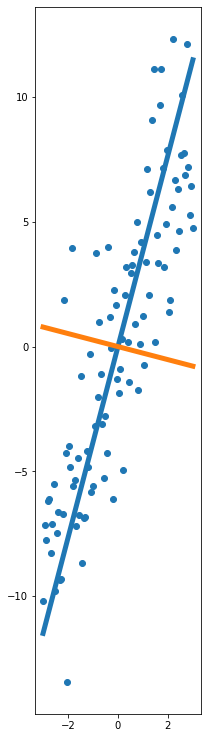

In [18]:
#ahora viene un overplot de los datos con la direccion del autovector
# correspondiente al autovalor mas grande (azul) y el mas pequeno (verde)
fig = plt.figure(figsize=(4,13))
ax = plt.axes()
plt.scatter(data[:,0], data[:,1])
x_line = np.linspace(-3.0,3.0)
plt.plot(x_line, x_line*vectors[1,0]/vectors[0,0], linewidth=5.0)
plt.plot(x_line, x_line*vectors[1,1]/vectors[0,1], linewidth=5.0)
ax.set_aspect(1.0)

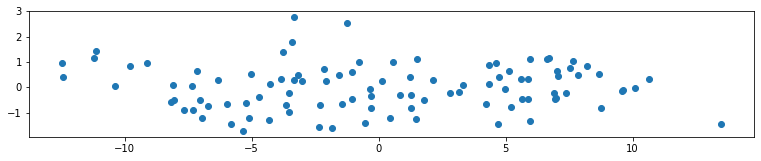

In [19]:
#Ahora expresamos los datos en la nueva base
new_data = np.dot(vectors.T, data.T)
fig = plt.figure(figsize=(13,4))
ax = plt.axes()
plt.scatter(new_data[0,:], new_data[1,:])
x_line = np.linspace(-3.0,3.0)
ax.set_aspect(1.0)